In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

class_labels = {0: 'Top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
                5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

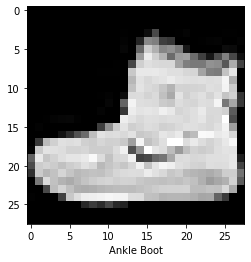

 10%|████████▎                                                                          | 1/10 [00:00<00:00,  9.17it/s]

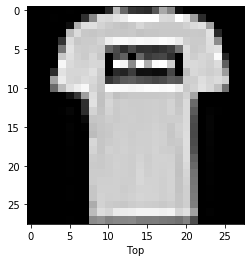

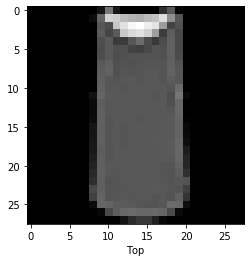

 30%|████████████████████████▉                                                          | 3/10 [00:00<00:00,  9.65it/s]

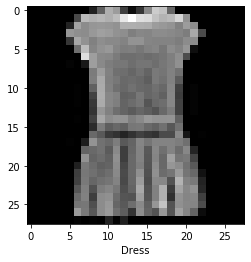

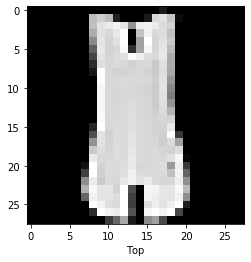

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:00<00:00,  9.96it/s]

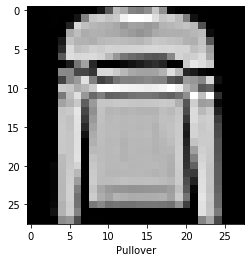

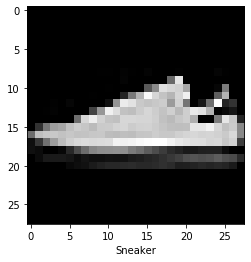

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:00<00:00, 10.24it/s]

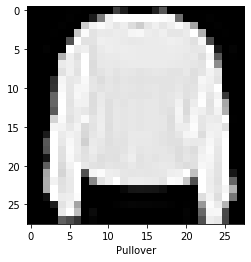

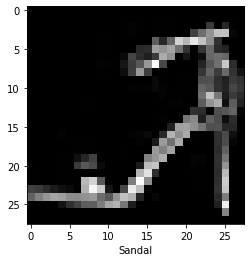

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:00<00:00, 10.42it/s]

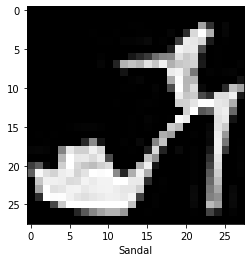

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.60it/s]


In [5]:
for i in tqdm(range(10)):
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_labels[y_train[i]])
    plt.show()

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

x_train = x_train.reshape(-1,28, 28, 1)
x_test = x_test.reshape(-1,28, 28, 1)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [9]:
checkpoint = ModelCheckpoint(os.getcwd() + "\\Trained Models\\fashion_mnist_cnn.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True)

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir='log_dir\\model', histogram_freq=1)

callbacks = [earlystop, checkpoint, tensorboard_callback]

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_test, y_test), callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
59968/60000 [============================>.] - ETA: 0s - loss: 0.6808 - accuracy: 0.7391
Epoch 00001: val_loss improved from inf to 0.45832, saving model to C:\StudyFast\EpicDL\Trained Models\fashion_mnist_cnn.h5
60000/60000 [==============================] - 9s 154us/sample - loss: 0.6806 - accuracy: 0.7391 - val_loss: 0.4583 - val_accuracy: 0.8236
Epoch 2/30
59968/60000 [============================>.] - ETA: 0s - loss: 0.4570 - accuracy: 0.8287
Epoch 00002: val_loss improved from 0.45832 to 0.38288, saving model to C:\StudyFast\EpicDL\Trained Models\fashion_mnist_cnn.h5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4570 - accuracy: 0.8287 - val_loss: 0.3829 - val_accuracy: 0.8575
Epoch 3/30
59968/60000 [============================>.] - ETA: 0s - loss: 0.3940 - accuracy: 0.8530
Epoch 00003: val_loss improved from 0.38288 to 0.34587, saving model to C:\StudyFast\EpicDL\Trained Models\fashion_mnist

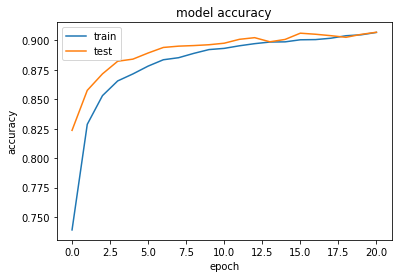

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

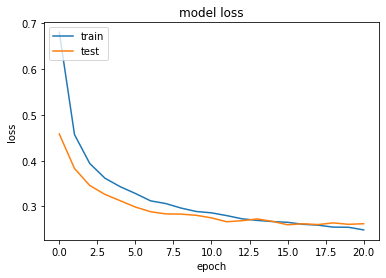

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
from tensorflow.keras.models import load_model
loaded_model = load_model(os.getcwd() + "\\Trained Models\\fashion_mnist_cnn.h5")

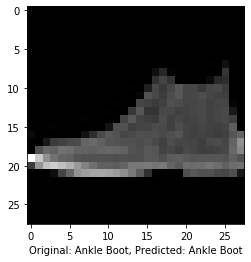

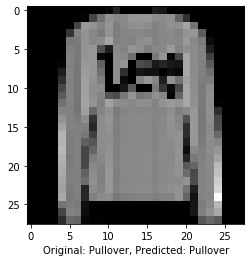

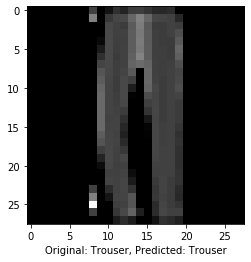

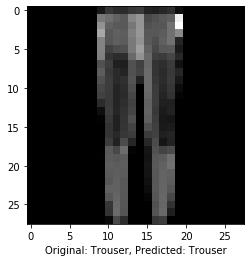

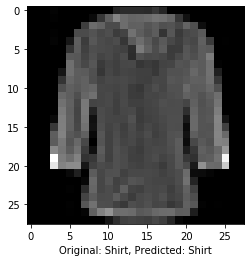

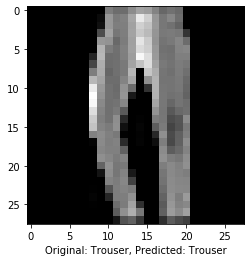

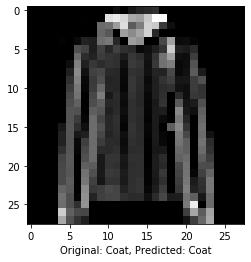

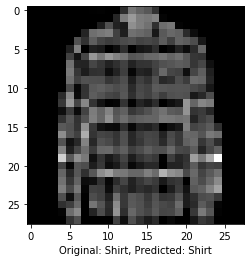

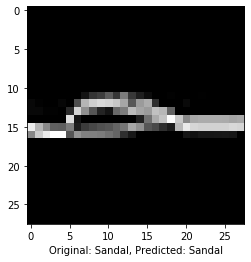

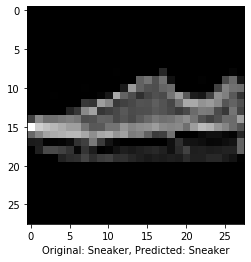

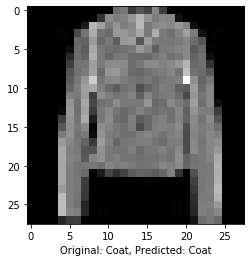

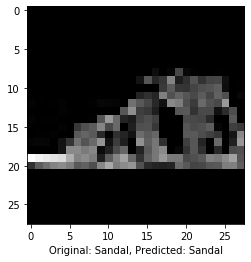

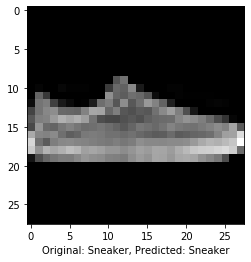

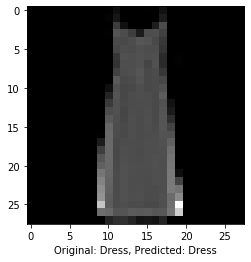

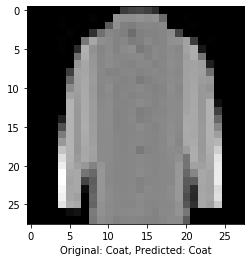

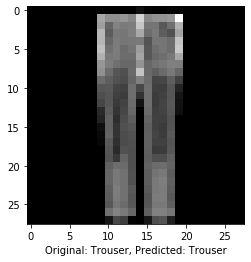

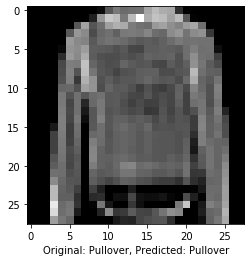

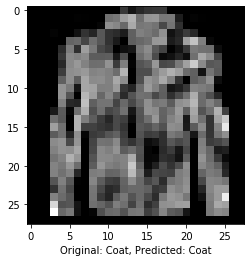

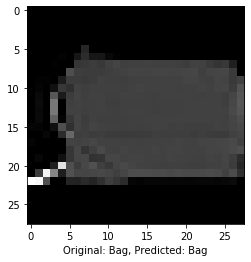

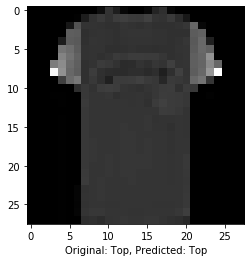

In [14]:
predictions = loaded_model.predict([x_test])

for x in range(20):
    plt.imshow(np.squeeze(x_test[x]), cmap='gray')
    predicted_label = np.argmax(predictions[x])
    label = "Original: {}, Predicted: {}".format(class_labels[np.argmax(y_test[x])],class_labels[predicted_label])
    plt.xlabel(label)
    plt.show()